### 부분회귀 플롯
- 독립변수가 많을 때 하나의 독립변수의 영향력을 시각화하는 방법이다.


In [1]:
from sklearn.datasets import load_boston
import statsmodels.api as sm
import pandas as pd
boston = load_boston()
dfx0 = pd.DataFrame(boston.data, columns = boston.feature_names)
dfx = sm.add_constant(dfx0)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])
df = pd.concat([dfx, dfy], axis = 1)

model_boston = sm.OLS(dfy, dfx)
result_boston = model_boston.fit()

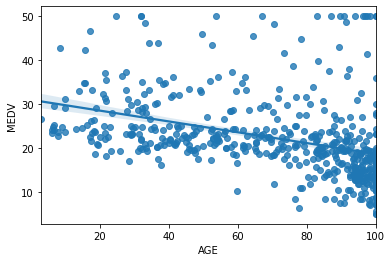

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show() # Age와 가격은 음의 상관관계가 있어보이지만 아니다.

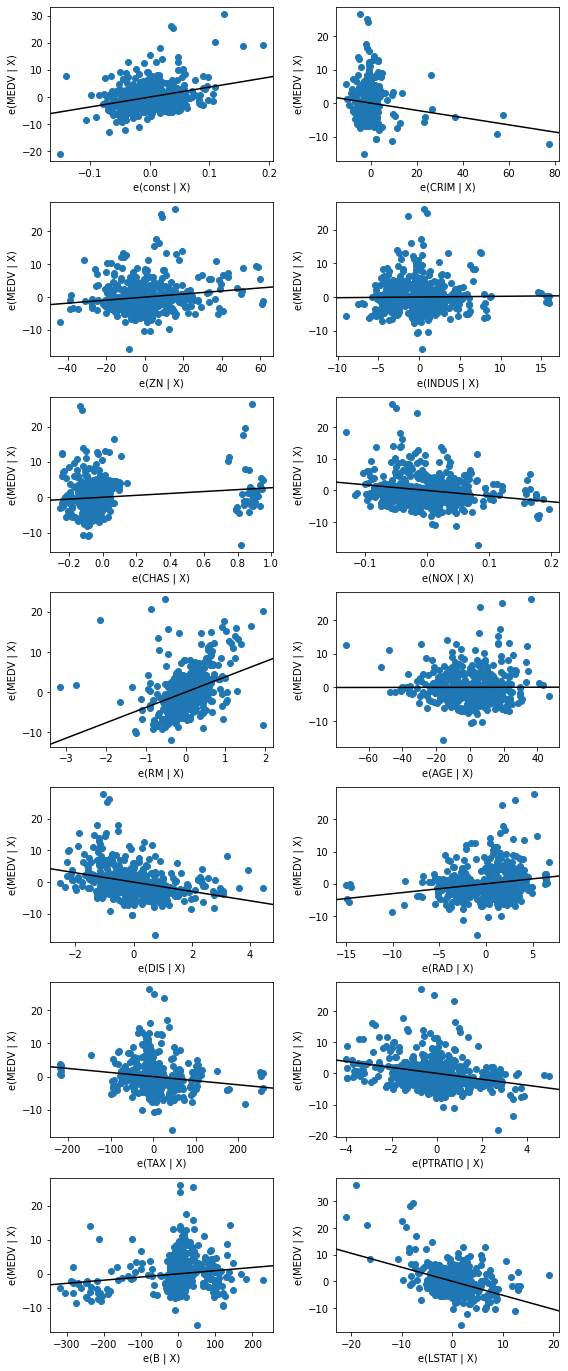

In [3]:
fig = plt.figure(figsize = (8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show() # Age는 집값과 관계가 없다

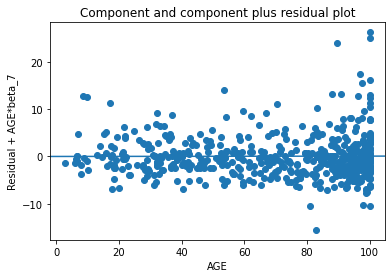

In [4]:
#CCPR
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

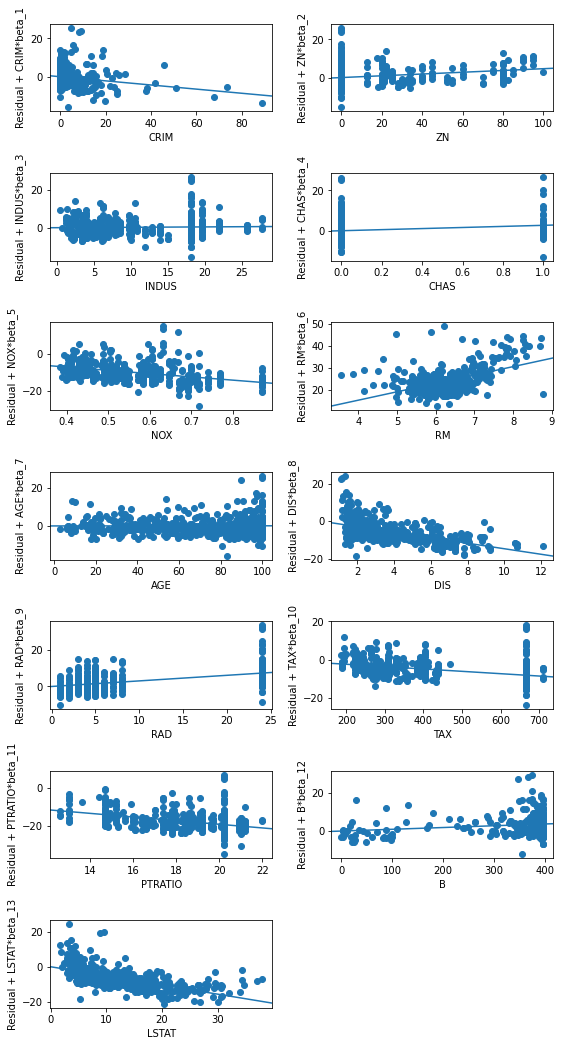

In [5]:
fig = plt.figure(figsize = (8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

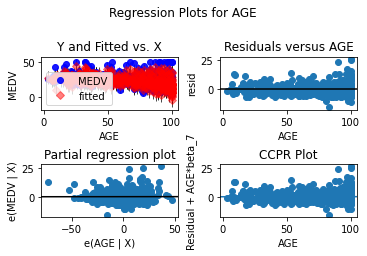

In [6]:
# plot_regress_exog 명령은 부분회귀 플롯과 ccpr플롯을 같이 보여준다.
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad = 4, h_pad = 0.5, w_pad = 0.5)
plt.show()